In [57]:
from fredapi import Fred
import requests
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
weather_url = ' https://api.weather.gov/gridpoints/TOP/31,80/forecast'
r = requests.get(weather_url)
r.content

b'{\n    "@context": [\n        "https://geojson.org/geojson-ld/geojson-context.jsonld",\n        {\n            "@version": "1.1",\n            "wx": "https://api.weather.gov/ontology#",\n            "geo": "http://www.opengis.net/ont/geosparql#",\n            "unit": "http://codes.wmo.int/common/unit/",\n            "@vocab": "https://api.weather.gov/ontology#"\n        }\n    ],\n    "type": "Feature",\n    "geometry": {\n        "type": "Polygon",\n        "coordinates": [\n            [\n                [\n                    -97.1089731,\n                    39.766826299999998\n                ],\n                [\n                    -97.108526900000001,\n                    39.744778799999999\n                ],\n                [\n                    -97.079846700000004,\n                    39.745119500000001\n                ],\n                [\n                    -97.08028680000001,\n                    39.767167000000001\n                ],\n                [\n        

SP500 ($  /share)      2330
FEDFUNDS (%)           2330
FGEXPND (Bil. of $)    2330
dtype: int64


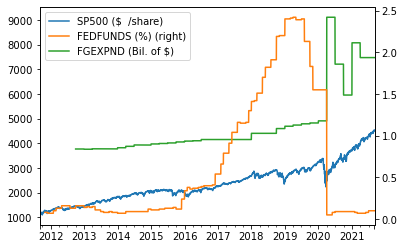

In [58]:
fred = Fred(api_key='6f2f81fce97aa422c54836a13d08ebe2')#,response_type='df')
series = ['SP500','FEDFUNDS','FGEXPND']
data = [fred.get_series(x) for x in series]
df = pd.DataFrame()
for i, data_series in enumerate(data):
    #if series[i] = 'FGEXPEND':
    info_list = fred.search(series[i])[['title','units_short']]
    #print(info_list)
    df[series[i]+' ('+str(info_list['units_short'][0])+')'] = data_series


df_filt = df.fillna(method="ffill")
df_filt.rename(columns={'SP500 (Index)':'SP500 ($  /share)'}, inplace=True)
print(df_filt.dropna(how='any').count())
df_filt.dropna(how='any').head()

ax = df_filt.plot(secondary_y='FEDFUNDS (%)')
#ax2 = ax.twinx()
#ax2.set_yscale('log')

plt.show()

#df_filt.plot()

In [5]:
df_filt.head()


,SP500 ($ /share),FEDFUNDS (%),FGEXPND (Bil. of $)
2011-08-29,1210.08,NaN,NaN
2011-08-30,1212.92,NaN,NaN
2011-08-31,1218.89,NaN,NaN
2011-09-01,1204.42,0.08,NaN
2011-09-02,1173.97,0.08,NaN


## Weather API

In [62]:

#https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation
dataTypes = 'PRCP,TAVG'#'DP01,DP05,DP10,DSND,DSNW,DT00,DT32,DX32,DX70,DX90,SNOW,PRCP'#'WIND_DIR,WIND_SPEED,TEMP'
startDate = '1880-01-01'
endDate = '2021-08-01'
dataset= 'global-summary-of-the-month'#'global-marine'# 'land-based-station/noaa-global-temp' #
stations = 'USW00094728'
url_orig = 'https://www.ncei.noaa.gov/access/services/data/v1?dataset=global-summary-of-the-year&dataTypes={}&stations=ASN00084027&startDate=1952-01-01&endDate=1970-12-31&includeAttributes=true&format=csv'
url = 'https://www.ncei.noaa.gov/access/services/data/v1?dataset={}&dataTypes={}&stations={}&startDate={}&endDate={}&includeAttributes=true&format=csv' \
    .format(dataset, dataTypes, stations, startDate, endDate)
print(url)
print(url_orig)

df_temp = pd.read_csv(url)
df_temp['DATE'] = df_temp['DATE'].apply(lambda x: str(x)+'-01')
#df_temp.set_index('DATE', inplace=True)
df_temp['DATE'] = pd.to_datetime(df_temp['DATE'])
df_temp['TAVG_HIGH'] = df_temp.TAVG.apply(lambda x: True if x > 20 else False)
df_temp['TAVG (deg F /10)'] = df_temp.TAVG.apply(lambda x: x/10)
df_temp['Season'] = df_temp.DATE.apply(lambda x: 'Summer'if '-08-' in str(x) else 'Fall')
df_temp.tail()

https://www.ncei.noaa.gov/access/services/data/v1?dataset=global-summary-of-the-month&dataTypes=PRCP,TAVG&stations=USW00094728&startDate=1880-01-01&endDate=2021-08-01&includeAttributes=true&format=csv
https://www.ncei.noaa.gov/access/services/data/v1?dataset=global-summary-of-the-year&dataTypes={}&stations=ASN00084027&startDate=1952-01-01&endDate=1970-12-31&includeAttributes=true&format=csv


,STATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TAVG_HIGH,TAVG (deg F /10),Season
1695,USW00094728,2021-04-01,68.5,",,,W",12.54,",W",False,1.254,Fall
1696,USW00094728,2021-05-01,110.8,",,,W",17.15,",W",False,1.715,Fall
1697,USW00094728,2021-06-01,66.7,",,,W",23.48,",W",True,2.348,Fall
1698,USW00094728,2021-07-01,281.9,",,,W",24.46,",W",True,2.446,Fall
1699,USW00094728,2021-08-01,NaN,NaN,NaN,NaN,False,NaN,Summer


,STATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TAVG_HIGH,TAVG (deg F /10),Season
1686,USW00094728,2020-07-01,167.1,",,,W",26.68,",W",True,2.668,Fall
1687,USW00094728,2020-08-01,127.9,",,,W",24.93,",W",True,2.493,Summer
1688,USW00094728,2020-09-01,100.1,",,,W",20.43,",W",True,2.043,Fall
1697,USW00094728,2021-06-01,66.7,",,,W",23.48,",W",True,2.348,Fall
1698,USW00094728,2021-07-01,281.9,",,,W",24.46,",W",True,2.446,Fall


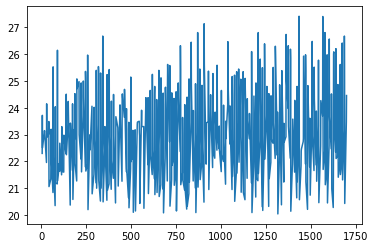

In [63]:
df_temp_high = df_temp[df_temp.TAVG_HIGH==True]
df_temp_high['TAVG'].plot()
df_temp_high.tail()
#df_temp.set_index('DATE')['TAVG'][df_temp.TAVG_HIGH==True].plot()

In [64]:
print(df_filt.reset_index().dtypes)
print(df_temp.dtypes)

df_merge = df_filt.reset_index().merge(df_temp_high, how='left', left_on='index', right_on='DATE')#.concat([df_filt,df_temp]).fillna(method="ffill").drop_duplicates(subset='index')
df_merge.tail()

index                  datetime64[ns]
SP500 ($  /share)             float64
FEDFUNDS (%)                  float64
FGEXPND (Bil. of $)           float64
dtype: object
STATION                     object
DATE                datetime64[ns]
PRCP                       float64
PRCP_ATTRIBUTES             object
TAVG                       float64
TAVG_ATTRIBUTES             object
TAVG_HIGH                     bool
TAVG (deg F /10)           float64
Season                      object
dtype: object


,index,SP500 ($ /share),FEDFUNDS (%),FGEXPND (Bil. of $),STATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TAVG_HIGH,TAVG (deg F /10),Season
2605,2021-08-30,4528.79,0.1,7472.223,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2606,2021-08-31,4522.68,0.1,7472.223,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2607,2021-09-01,4524.09,0.1,7472.223,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,2021-09-02,4536.95,0.1,7472.223,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2609,2021-09-03,4535.43,0.1,7472.223,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_merge[df_merge['TAVG (deg F /10)'] > 1]

,index,SP500 ($ /share),FEDFUNDS (%),FGEXPND (Bil. of $),STATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TAVG_HIGH,TAVG (deg F /10),Season
194,2012-06-01,1278.04,0.16,NaN,USW00094728,2012-06-01,75.6,",,,X",21.66,",X",True,2.166,Fall
237,2012-08-01,1375.14,0.13,NaN,USW00094728,2012-08-01,74.1,",,,X",24.84,",X",True,2.484,Summer
475,2013-07-01,1614.96,0.09,3774.113,USW00094728,2013-07-01,72.2,",,,W",26.57,",W",True,2.657,Fall
498,2013-08-01,1706.87,0.08,3774.113,USW00094728,2013-08-01,72.5,",,,W",23.67,",W",True,2.367,Summer
736,2014-07-01,1973.32,0.09,3933.198,USW00094728,2014-07-01,142.0,",,,W",24.52,",W",True,2.452,Fall
759,2014-08-01,1925.15,0.09,3933.198,USW00094728,2014-08-01,57.2,",,,W",23.62,",W",True,2.362,Summer
780,2014-09-01,2003.37,0.09,3933.198,USW00094728,2014-09-01,30.7,",,,W",20.97,",W",True,2.097,Fall
954,2015-05-01,2108.29,0.12,3993.062,USW00094728,2015-05-01,47.2,",,,W",20.28,",W",True,2.028,Fall
975,2015-06-01,2111.73,0.13,3993.062,USW00094728,2015-06-01,121.7,",,,W",21.77,",W",True,2.177,Fall
997,2015-07-01,2077.42,0.13,4015.190,USW00094728,2015-07-01,100.9,",,,W",26.00,",W",True,2.600,Fall


Index(['index', 'SP500 ($  /share)', 'FEDFUNDS (%)', 'FGEXPND (Bil. of $)',
       'STATION', 'DATE', 'PRCP', 'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TAVG_HIGH', 'TAVG (deg F /10)', 'Season'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

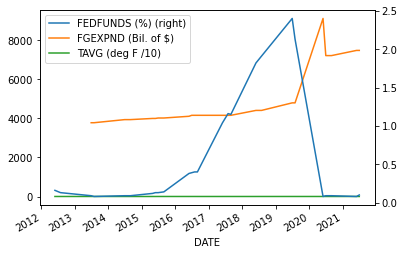

In [67]:
plt.clf()
print(df_merge.columns)
cols=['DATE','FEDFUNDS (%)','FGEXPND (Bil. of $)','TAVG (deg F /10)']
ax = df_merge[cols].set_index('DATE').plot(secondary_y='FEDFUNDS (%)')
#ax2 = ax.twinx()
#ax2.set_yscale('log')

plt.show()

In [51]:
df_merge['TAVG'].mean()

23.522857142857138